In [1]:
import copy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
fontsize = 20
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]

In [4]:
import MDAnalysis as mda
import numpy as np

In [6]:
# create a universe from the dump file
# guess bond based on distance from the initial topology
u = mda.Universe("cnt_atom.data", "dump.lammpstrj",
                 topology_format="data", format="lammpsdump",
                 guess_bonds=True, vdwradii={'1':1.7})
# create a group
cnt = u.select_atoms("type 1")

In [7]:
nbond_vs_time = []
lbond_vs_time = []
# loop over trajectory
for ts in u.trajectory:
    # sabe the bond of the timestep ts in a list
    all_bonds_ts = []
    # loop over all initially detected bond
    for id1, id2 in cnt.atoms.bonds.indices:
        # detect positions
        pos1 = u.atoms.positions[u.atoms.indices == id1]
        pos2 = u.atoms.positions[u.atoms.indices == id2]
        d = pos1-pos2
        r = np.sqrt(d[:, 0]**2 + d[:, 1]**2 + d[:, 2]**2)
        if r < 1.8: # assume that bond longer than 1.8 angstroms are broken
            all_bonds_ts.append(r)
    lbond_vs_time.append([ts.time*5000*0.0005, np.mean(all_bonds_ts)]) 
    nbond_vs_time.append([ts.time*5000*0.0005, len(all_bonds_ts)/2]) # divide by 2 to avoid counting twice
nbond_vs_time = np.array(nbond_vs_time)
lbond_vs_time = np.array(lbond_vs_time)

/tmp/ipykernel_132679/2251229612.py:16: UserWarning: Reader has no dt information, set to 1.0 ps
  lbond_vs_time.append([ts.time*5000*0.0005, np.mean(all_bonds_ts)])
/tmp/ipykernel_132679/2251229612.py:17: UserWarning: Reader has no dt information, set to 1.0 ps
  nbond_vs_time.append([ts.time*5000*0.0005, len(all_bonds_ts)/2]) # divide by 2 to avoid counting twice


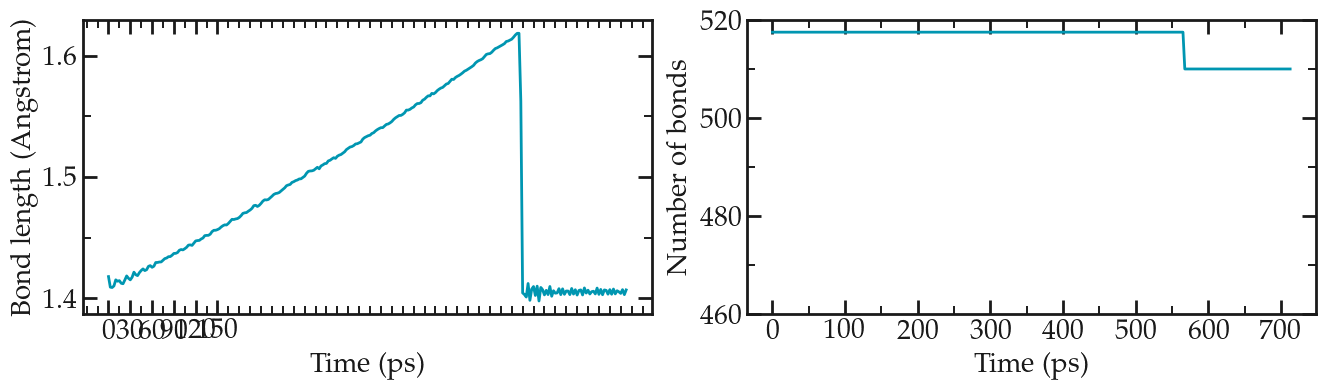

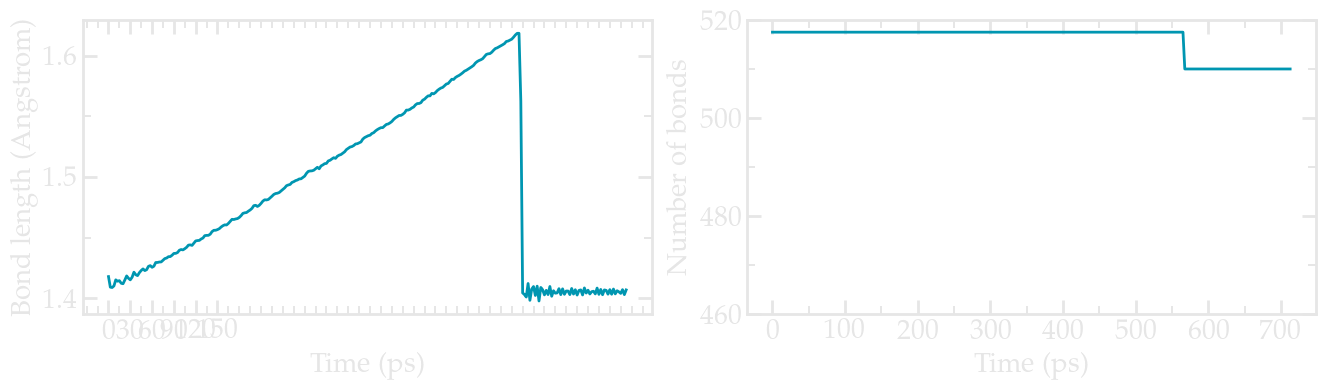

In [8]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(20, 4))
    ax1 = fig.add_subplot(131)
    plt.plot(lbond_vs_time.T[0], lbond_vs_time.T[1], linewidth = 2, color=myblue)
    divider = make_axes_locatable(ax1)
    ax1.set_xlabel('Time (ps)', fontdict=font)
    ax1.set_ylabel('Bond length (Angstrom)', fontdict=font)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=2, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(2)
    ax1.spines["bottom"].set_linewidth(2)
    ax1.spines["left"].set_linewidth(2)
    ax1.spines["right"].set_linewidth(2)
    ax1.set_xticks([0, 30, 60, 90, 120, 150])
    ax1.set_yticks([1.4, 1.5, 1.6])
    minor_locator_y = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator_y)
    minor_locator_x = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)

    ax2 = fig.add_subplot(132)
    plt.plot(nbond_vs_time.T[0], nbond_vs_time.T[1], linewidth = 2, color=myblue)
    divider = make_axes_locatable(ax1)
    ax2.set_xlabel('Time (ps)', fontdict=font)
    ax2.set_ylabel('Number of bonds', fontdict=font)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    ax2.minorticks_on()
    ax2.tick_params('both', length=10, width=2, which='major', direction='in')
    ax2.tick_params('both', length=6, width=1.4, which='minor', direction='in')
    ax2.xaxis.set_ticks_position('both')
    ax2.yaxis.set_ticks_position('both')
    ax2.spines["top"].set_linewidth(2)
    ax2.spines["bottom"].set_linewidth(2)
    ax2.spines["left"].set_linewidth(2)
    ax2.spines["right"].set_linewidth(2)
    ax1.set_xticks([0, 30, 60, 90, 120, 150])
    ax2.set_yticks([460, 480, 500, 520])
    minor_locator_y = AutoMinorLocator(2)
    ax2.yaxis.set_minor_locator(minor_locator_y)
    minor_locator_x = AutoMinorLocator(2)
    ax2.xaxis.set_minor_locator(minor_locator_x)
    ax2.xaxis.label.set_color(mygray)
    ax2.yaxis.label.set_color(mygray)
    ax2.tick_params(axis='x', colors=mygray)
    ax2.tick_params(axis='y', colors=mygray)
    ax2.tick_params(axis='x', colors=mygray)
    ax2.tick_params(axis='y', colors=mygray)
    ax2.spines['left'].set_color(mygray)
    ax2.spines['top'].set_color(mygray)
    ax2.spines['bottom'].set_color(mygray)
    ax2.spines['right'].set_color(mygray)
    ax2.tick_params(axis='y', which='both', colors=mygray)
    ax2.tick_params(axis='x', which='both', colors=mygray)

    fig.tight_layout()
    if mode == 'light':
        plt.savefig('bond-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/level1/breaking-a-carbon-nanotube/bond-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        plt.savefig('bond-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/level1/breaking-a-carbon-nanotube/bond-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)        
    plt.show()